#Atividade Semana 02

Vocês devem encontrar um dataset que haja alguma variável de Bernoulli e fazer as seguintes análises:

1. Realizar os três tipos de amostragem estudados

2. Calcular p e q, a média e o desvio padrão para a variável de Bernoulli

3. Modelar a distribuição de probabilidade Binomial para a variável em n tentativas.

#Registro Clínicos de insuficiência cardiáca

data set contém um conjunto de características

que podem ser usadas para prever a mortalidade por

insuficiência cardíaca.

In [ ]:
#Importando Bibliotecas 
import pandas as pd
import numpy as np
import matplotlib as plt


In [ ]:
#Carregandp base de dados
df = pd.read_csv('/content/drive/My Drive/heart_failure_clinical.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# Tipos de Amostragem
* Aostragem Aleatória
* Amostragem Estratificada
* Amostragem Sistemática

## Amostragem Aleatória
* Todos os membros de uma população têm chances iguais de serem selecionados

In [ ]:
#Amostragem Aleatória
pacientAge = df.age
pacientAge.max()


95.0

Fazemdo uso da lib random e possível selecionar uma quantidade aleatória de indivíduos sem repati-los


In [ ]:
import random
#Seleciona 100 paciente por idade sem repeti-los
pacientSelected = random.sample(list(pacientAge), 100)
pacientSelected

[42.0,
 53.0,
 60.0,
 40.0,
 50.0,
 58.0,
 47.0,
 50.0,
 60.667,
 65.0,
 60.0,
 65.0,
 59.0,
 85.0,
 70.0,
 62.0,
 75.0,
 65.0,
 58.0,
 57.0,
 65.0,
 86.0,
 42.0,
 60.0,
 72.0,
 40.0,
 49.0,
 54.0,
 62.0,
 65.0,
 45.0,
 50.0,
 60.0,
 70.0,
 66.0,
 60.0,
 49.0,
 80.0,
 62.0,
 58.0,
 50.0,
 43.0,
 60.0,
 50.0,
 75.0,
 60.0,
 55.0,
 45.0,
 45.0,
 42.0,
 64.0,
 75.0,
 60.0,
 85.0,
 54.0,
 80.0,
 70.0,
 55.0,
 75.0,
 60.0,
 70.0,
 42.0,
 60.0,
 58.0,
 55.0,
 90.0,
 40.0,
 75.0,
 60.0,
 75.0,
 59.0,
 65.0,
 65.0,
 61.0,
 60.0,
 95.0,
 45.0,
 70.0,
 65.0,
 63.0,
 79.0,
 46.0,
 45.0,
 60.0,
 72.0,
 63.0,
 60.0,
 82.0,
 65.0,
 60.0,
 60.0,
 50.0,
 42.0,
 50.0,
 70.0,
 70.0,
 63.0,
 53.0,
 70.0,
 61.0]

# Amostra Estratificada
* Essa técnica de amostragem leva em consideração as caracterı́sticas da população

In [ ]:
#Criando lista dos dos pacientes variando por faixa de idades 
#(variação na base de dados entre 40 e 95)
ageRange01 = []
ageRange02 = []
ageRange03 = []

for i in pacientSelected:
  if i >= 40 and i <= 60:
    ageRange01.append(i)
  elif i > 60 and i <= 80:
    ageRange02.append(i)
  else: 
    ageRange03.append(i)

In [ ]:
pacientSelecteds = []
pacientSelecteds.append(random.sample(list(ageRange01),3))
pacientSelecteds.append(random.sample(list(ageRange02),3))
pacientSelecteds.append(random.sample(list(ageRange03),3))
pacientSelecteds

[[60.0, 59.0, 49.0], [72.0, 70.0, 63.0], [86.0, 95.0, 85.0]]

# Amostra sistemática 
* Uma amostra sistemática é aquela na qual é atribuı́do um número a cada membro da população

In [ ]:
pacients =[pacientSelected[i] for i in range(0,100,7)]
pacients

[42.0,
 50.0,
 70.0,
 86.0,
 62.0,
 60.0,
 60.0,
 42.0,
 70.0,
 58.0,
 59.0,
 70.0,
 72.0,
 50.0,
 70.0]

# Distribuição de Bernoulli
* Existem muitos experimentos que adimitem apenas dois resultados: sucesso ou fracasso
* Experimentos de probabilidade como esses são chamados de ensaios de Bernoulli

In [ ]:
smokings = []
noSmokings = []

population = list(df.smoking)

for i in population:
  if i == 0:
    noSmokings.append(i)
  else:
    smokings.append(i)

Separando uma amostra que contem pessoas fumantes e não fumantes para fazer a análise

In [ ]:
#Calculando p
p = len(smokings) / len(population)
p

0.3210702341137124

In [ ]:
#Calculando q
q = len(noSmokings) / len(population)
q

0.6789297658862876

In [ ]:
#Média para essa distribuição de probabilidade é dada por
#E(X) = p
p = len(smokings) / len(population)
p

0.3210702341137124

In [ ]:
#Variâncai para essa distribuição de probabilidade é dada por:
#VAR(X) = p.q
var = p * q
var

0.2179841388798783

# Distribuição Binomial
* Estudo de ensaios de Bernoulli repetidas vezes

In [ ]:
from math import factorial

In [ ]:
def probBinomial(x,n,p,q):
  return (factorial(n)/(factorial(n-x)*factorial(x)))*(p**x)*(q**(n-x))

In [ ]:

n = 7
probs = []

for x in range(8):
  px = probBinomial(x,n,p,q)
  print('P(',x,')=',px)
  probs.append(px)

P( 0 )= 0.06649269676445063
P( 1 )= 0.2201137548064573
P( 2 )= 0.3122796127303434
P( 3 )= 0.24613171446726564
P( 4 )= 0.11639726398451972
P( 5 )= 0.03302700692368639
P( 6 )= 0.005206227692403767
P( 7 )= 0.00035172263087316085


In [ ]:
np.sum(probs)

1.0

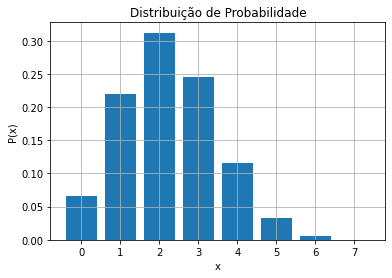

In [ ]:
#histograma de frequência
import matplotlib.pyplot as plt

x = [0,1,2,3,4,5,6,7]
plt.bar(x,probs)
plt.xlabel('x')
plt.ylabel('P(x)')
plt.title('Distribuição de Probabilidade')
plt.grid(True)
plt.show()

dentre o pacientes selecionados, podemos ver que para valores de x entre 1 e 3 a porcentagem desse paciente ser um fumante fica a cima dos vinte por cento

Jà selecionando 7 pacientes e verificando a probabilidade de haver pelo menos 4 pacientes fumantes temos:

In [ ]:
p4 = probBinomial(4,n,p,q)
p4

0.11639726398451972

In [ ]:
p5 = probBinomial(5,n,p,q)
p5

0.03302700692368639

In [ ]:
p6 = probBinomial(6,n,p,q)
p6

0.005206227692403767

In [ ]:
p7 = probBinomial(7,n,p,q)
p7

0.00035172263087316085

In [ ]:
p4 + p5 + p6 + p7

0.154982221231483

Temos uma probabilidade de quinze por cento desse paciente ser fumanate